In [137]:
import pymssql
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
#######################################
# Data Load
#######################################

# AWS
server = 'pfidb.ci3ir6nuotoi.sa-east-1.rds.amazonaws.com'
user = 'admin'
password = 'AramLucas2020.'
db = 'pfidb'

conn = pymssql.connect(server,user,password,db)

paths_2018_df = pd.read_sql_query("SELECT * FROM [dbo].[recorridos-realizados-2018]", conn)
stations_df = pd.read_sql_query("SELECT * FROM [dbo].[estaciones-de-bicicletas-publicas]", conn)

In [168]:
bak_df = paths_2018_df.copy()
paths_2018_df = paths_2018_df.dropna()
paths_2018_df.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_estacion_origen,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:00,00:19:53,45,183,M,45
1,673,2018-01-01 00:18:00,00:26:19,189,110,M,61
2,179119,2018-01-01 00:20:00,00:27:39,50,31,F,52
3,400147,2018-01-01 00:20:00,00:48:51,111,54,M,27
4,400156,2018-01-01 00:20:00,00:49:27,111,54,F,27


In [169]:
#######################################
# Data Manipulation
#######################################

# Create the return date
paths_2018_df['bici_tiempo_uso'] = pd.to_timedelta(paths_2018_df['bici_tiempo_uso'].astype(str))
paths_2018_df['bici_Fecha_hora_devolucion'] = paths_2018_df['bici_Fecha_hora_retiro'] + paths_2018_df['bici_tiempo_uso']
    
paths_2018_df.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_estacion_origen,bici_estacion_destino,bici_sexo,bici_edad,bici_Fecha_hora_devolucion
0,5453,2018-01-01 00:08:00,00:19:53,45,183,M,45,2018-01-01 00:27:53
1,673,2018-01-01 00:18:00,00:26:19,189,110,M,61,2018-01-01 00:44:19
2,179119,2018-01-01 00:20:00,00:27:39,50,31,F,52,2018-01-01 00:47:39
3,400147,2018-01-01 00:20:00,00:48:51,111,54,M,27,2018-01-01 01:08:51
4,400156,2018-01-01 00:20:00,00:49:27,111,54,F,27,2018-01-01 01:09:27


In [170]:
# Round the withdraw time
paths_2018_df['bici_Fecha_hora_retiro_round'] = paths_2018_df['bici_Fecha_hora_retiro'].apply(lambda x: x.replace(minute=0, second=0))
paths_2018_df['bici_Fecha_hora_devolucion_round'] = paths_2018_df['bici_Fecha_hora_devolucion'].apply(lambda x: x.replace(minute=0, second=0))

paths_2018_df[['bici_Fecha_hora_retiro','bici_Fecha_hora_retiro_round', 'bici_Fecha_hora_devolucion', 'bici_Fecha_hora_devolucion_round']].head(30)

,bici_Fecha_hora_retiro,bici_Fecha_hora_retiro_round,bici_Fecha_hora_devolucion,bici_Fecha_hora_devolucion_round
0,2018-01-01 00:08:00,2018-01-01 00:00:00,2018-01-01 00:27:53,2018-01-01 00:00:00
1,2018-01-01 00:18:00,2018-01-01 00:00:00,2018-01-01 00:44:19,2018-01-01 00:00:00
2,2018-01-01 00:20:00,2018-01-01 00:00:00,2018-01-01 00:47:39,2018-01-01 00:00:00
3,2018-01-01 00:20:00,2018-01-01 00:00:00,2018-01-01 01:08:51,2018-01-01 01:00:00
4,2018-01-01 00:20:00,2018-01-01 00:00:00,2018-01-01 01:09:27,2018-01-01 01:00:00
5,2018-01-01 00:21:00,2018-01-01 00:00:00,2018-01-01 00:57:10,2018-01-01 00:00:00
6,2018-01-01 00:21:00,2018-01-01 00:00:00,2018-01-01 00:56:31,2018-01-01 00:00:00
7,2018-01-01 00:22:00,2018-01-01 00:00:00,2018-01-01 00:53:07,2018-01-01 00:00:00
8,2018-01-01 00:23:00,2018-01-01 00:00:00,2018-01-01 00:57:28,2018-01-01 00:00:00
9,2018-01-01 00:24:00,2018-01-01 00:00:00,2018-01-01 00:41:08,2018-01-01 00:00:00


In [171]:
# Compute whitdraws for each station for each hour
withdraws_df = paths_2018_df[['bici_Fecha_hora_retiro_round', 'bici_estacion_origen', 'bici_id_usuario']].copy()
withdraws_df = withdraws_df.groupby(['bici_Fecha_hora_retiro_round', 'bici_estacion_origen'])['bici_id_usuario'].count().reset_index().sort_values('bici_Fecha_hora_retiro_round')
withdraws_df.rename(columns={'bici_id_usuario': 'retiros', 
                             'bici_Fecha_hora_retiro_round': 'fecha_y_hora', 
                             'bici_estacion_origen': 'estacion'}, inplace=True)
# Compute deposits for each station for each hour
deposits_df = paths_2018_df[['bici_Fecha_hora_devolucion_round', 'bici_estacion_destino', 'bici_id_usuario']].copy()
deposits_df = deposits_df.groupby(['bici_Fecha_hora_devolucion_round', 'bici_estacion_destino'])['bici_id_usuario'].count().reset_index().sort_values('bici_Fecha_hora_devolucion_round')
deposits_df.rename(columns={'bici_id_usuario': 'devoluciones', 
                             'bici_Fecha_hora_devolucion_round': 'fecha_y_hora', 
                             'bici_estacion_destino': 'estacion'}, inplace=True)
deposits_df.head(30)

,fecha_y_hora,estacion,devoluciones
0,2018-01-01 00:00:00,18,1
11,2018-01-01 00:00:00,183,1
10,2018-01-01 00:00:00,168,1
8,2018-01-01 00:00:00,142,1
7,2018-01-01 00:00:00,111,1
6,2018-01-01 00:00:00,110,1
9,2018-01-01 00:00:00,143,2
4,2018-01-01 00:00:00,79,2
3,2018-01-01 00:00:00,71,1
2,2018-01-01 00:00:00,47,1


In [172]:
# Merge dataframes
stations_times_df = pd.merge(withdraws_df, deposits_df, on = ['fecha_y_hora', 'estacion'], how='outer')
stations_times_df.fillna(0, inplace=True)
stations_times_df['retiros'] = stations_times_df['retiros'].astype(int)
stations_times_df['devoluciones'] = stations_times_df['devoluciones'].astype(int)
stations_times_df['diferencia'] = stations_times_df['devoluciones'] - stations_times_df['retiros']
stations_times_df['usos'] = stations_times_df['devoluciones'] + stations_times_df['retiros']
stations_times_df.sort_values(['fecha_y_hora', 'estacion']).head(30)

,fecha_y_hora,estacion,retiros,devoluciones,diferencia,usos
0,2018-01-01 00:00:00,5,2,0,-2,2
15,2018-01-01 00:00:00,7,2,0,-2,2
412707,2018-01-01 00:00:00,18,0,1,1,1
14,2018-01-01 00:00:00,28,1,0,-1,1
412714,2018-01-01 00:00:00,31,0,1,1,1
13,2018-01-01 00:00:00,36,2,0,-2,2
12,2018-01-01 00:00:00,45,1,0,-1,1
11,2018-01-01 00:00:00,47,1,1,0,2
10,2018-01-01 00:00:00,50,1,0,-1,1
9,2018-01-01 00:00:00,58,1,0,-1,1


In [211]:
first_use_df = stations_times_df.sort_values(['fecha_y_hora', 'estacion'])[['fecha_y_hora', 'estacion']].drop_duplicates(subset='estacion').copy()
tmp_df = pd.merge(first_use_df, 
                  stations_df[['nro_est', 'capacidad']], 
                  left_on='estacion', right_on='nro_est', 
                  how='left')
stations_times_full_df = pd.merge(stations_times_df,
                             tmp_df[['fecha_y_hora', 'estacion', 'capacidad']],
                             on=['fecha_y_hora', 'estacion'],
                             how='left')
stations_times_full_df.rename(columns={'capacidad':'bicicletas_en_estacion'}, inplace=True)
stations_times_full_df['bicicletas_en_estacion'] += stations_times_full_df['diferencia'] 
stations_times_full_df.sort_values('fecha_y_hora', inplace=True)
stations_times_full_df.head(30)



,fecha_y_hora,estacion,retiros,devoluciones,diferencia,usos,bicicletas_en_estacion
0,2018-01-01 00:00:00,5,2,0,-2,2,40.0
412709,2018-01-01 00:00:00,142,0,1,1,1,11.0
412710,2018-01-01 00:00:00,110,0,1,1,1,13.0
412711,2018-01-01 00:00:00,143,0,2,2,2,14.0
412712,2018-01-01 00:00:00,79,0,2,2,2,22.0
412713,2018-01-01 00:00:00,71,0,1,1,1,21.0
412714,2018-01-01 00:00:00,31,0,1,1,1,13.0
412708,2018-01-01 00:00:00,168,0,1,1,1,11.0
16,2018-01-01 00:00:00,107,1,1,0,2,10.0
15,2018-01-01 00:00:00,7,2,0,-2,2,8.0


In [212]:
#station_5_df = stations_times_full_df[stations_times_full_df['estacion'] == 5].copy().sort_values('fecha_y_hora')
#station_5_df['previous_diff'] = station_5_df['diferencia'].shift(1)
#station_5_df['bicicletas'] = station_5_df['bicicletas_en_estacion']
#station_5_df.loc[station_5_df['bicicletas'].isna(), 'bicicletas'] = station_5_df.loc[station_5_df['bicicletas'].isna(), 'previous_diff'] 
#station_5_df['bicicletas'] = station_5_df['bicicletas'].cumsum()
#station_5_df.head(15)

for station in stations_df['nro_est'].unique():
    mask = stations_times_full_df['estacion'] == station
    stations_times_full_df.loc[mask, 'previous_diff'] = stations_times_full_df.loc[mask, 'diferencia'].shift(1)
    first_mask = stations_times_full_df.loc[mask, 'bicicletas_en_estacion'].isna()
    stations_times_full_df.loc[mask & first_mask, 'bicicletas_en_estacion'] = stations_times_full_df.loc[mask & first_mask, 'previous_diff']
    stations_times_full_df.loc[mask, 'bicicletas_en_estacion'] = stations_times_full_df.loc[mask, 'bicicletas_en_estacion'].cumsum()

stations_times_full_df.drop(columns='previous_diff', inplace=True
stations_times_full_df.head(20)

,fecha_y_hora,estacion,retiros,devoluciones,diferencia,usos,bicicletas_en_estacion,previous_diff
0,2018-01-01,5,2,0,-2,2,40.0,NaN
412709,2018-01-01,142,0,1,1,1,11.0,NaN
412710,2018-01-01,110,0,1,1,1,13.0,NaN
412711,2018-01-01,143,0,2,2,2,14.0,NaN
412712,2018-01-01,79,0,2,2,2,22.0,NaN
412713,2018-01-01,71,0,1,1,1,21.0,NaN
412714,2018-01-01,31,0,1,1,1,13.0,NaN
412708,2018-01-01,168,0,1,1,1,11.0,NaN
16,2018-01-01,107,1,1,0,2,10.0,NaN
15,2018-01-01,7,2,0,-2,2,8.0,NaN


In [233]:
stations_avg_df = stations_times_full_df.groupby('estacion')['bicicletas_en_estacion'].mean().reset_index()
stations_avg_df.sort_values('bicicletas_en_estacion').tail()

,estacion,bicicletas_en_estacion
11,12,177.228171
62,64,200.075154
30,32,227.866629
91,93,272.907184
59,61,299.977396


In [164]:
######################################## TESTING THINGS ######################################

station_usage_df = stations_times_df.groupby('estacion')['diferencia', 'usos'].agg({'diferencia':np.mean, 'usos':np.sum}).reset_index()
station_usage_df.sort_values('diferencia').tail()

,estacion,diferencia,usos
46,48,0.153846,6364
45,47,0.154333,6729
78,80,0.179746,9031
30,32,0.255295,9418
59,61,0.292383,8681


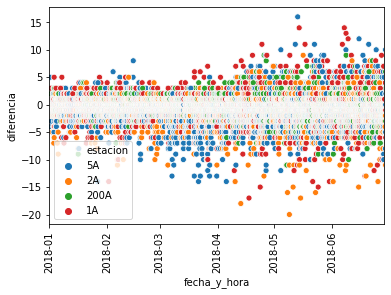

,fecha_y_hora,estacion,retiros,devoluciones,diferencia
0,2018-01-01 00:00:00,5A,2,0,-2
168,2018-01-01 07:00:00,5A,1,0,-1
201,2018-01-01 08:00:00,5A,1,0,-1
229,2018-01-01 09:00:00,2A,1,0,-1
251,2018-01-01 10:00:00,200A,1,0,-1
295,2018-01-01 11:00:00,200A,1,0,-1
360,2018-01-01 12:00:00,200A,1,0,-1
366,2018-01-01 12:00:00,5A,1,2,1
443,2018-01-01 13:00:00,5A,4,0,-4
445,2018-01-01 13:00:00,1A,1,2,1


In [150]:
# Plot difference in bikes per station over time for interesting stations
relevant_stations = [1, 2, 5, 200]
relevant_stations_df = stations_times_df[stations_times_df['estacion'].isin(relevant_stations)].copy()
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, 
                x='fecha_y_hora', 
                y='diferencia', 
                data= relevant_stations_df, 
                hue='estacion')
ax.set_xlim([date(2018, 1, 1), date(2018, 6, 29)])
plt.xticks(rotation=90)
plt.show()
relevant_stations_df.head(30)

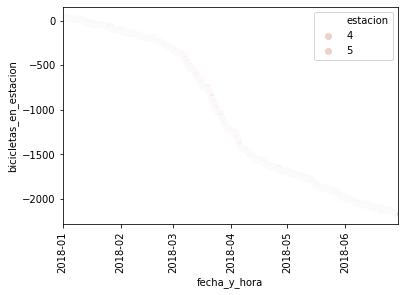

In [222]:
# Plot difference in bikes per station over time for interesting stations
relevant_stations = [1, 2, 5, 200]
relevant_stations_df = stations_times_full_df[stations_times_full_df['estacion'].isin([5])].copy()
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, 
                x='fecha_y_hora', 
                y='bicicletas_en_estacion', 
                data= relevant_stations_df,
               hue='estacion')
ax.set_xlim([date(2018, 1, 1), date(2018, 6, 29)])
plt.xticks(rotation=90)
plt.show()

In [225]:
relevant_stations_df.to_csv('station5.csv')